1. Data Exploration and Preprocessing


First 5 rows of the dataset:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB

Missing values per column:
Data      0
Labels    0
dtype: int64

Distribution of Categories:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.wi

C:\Users\Admin\AppData\Local\Temp\ipykernel_9352\4287173726.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index, palette='viridis')


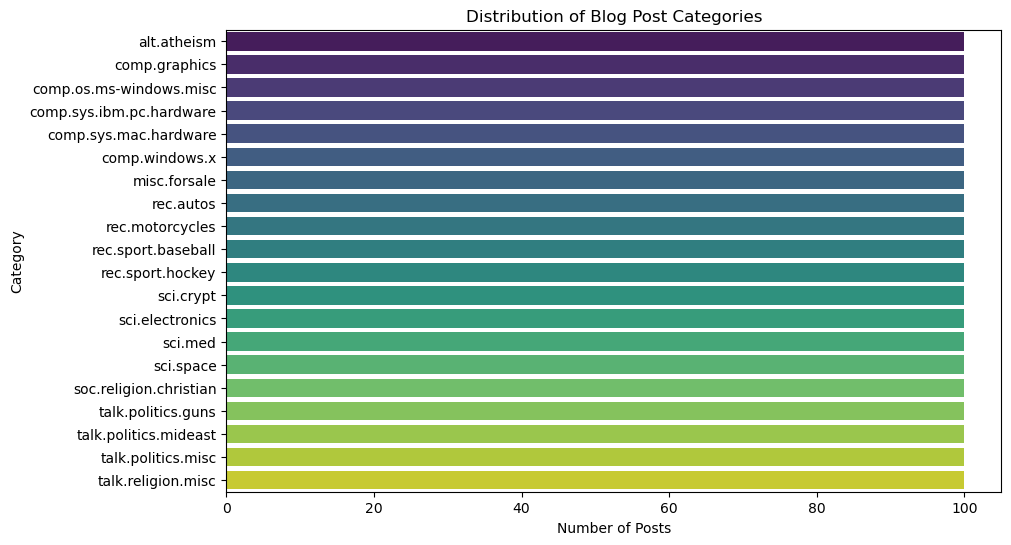

In [52]:
import pandas as pd


df = pd.read_csv("blogs.csv")

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Get the distribution of categories
print("\nDistribution of Categories:")
print(df['Labels'].value_counts())

# Visualize the category distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index, palette='viridis')
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Number of Posts')
plt.ylabel('Category')
plt.show()

In [53]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

def clean(x):
    x = x.lower()
    x = re.sub(r'[\.*?/]', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), '', x)
    x = re.sub(r'\w*\d\w*', '', x)
    x = re.sub(r'[0-9]', '', x)
    x = re.sub(r'["\'.,]', '', x)
    return x

df['Data'] = df['Data'].apply(clean)

stopword = set(stopwords.words('english'))

df['Data'] = df['Data'].apply(lambda x: x.split())
df['Data'] = df['Data'].apply(lambda tokens: [word for word in tokens if word not in stopword])

# Join back tokens for TF-IDF
df['Clean_Data'] = df['Data'].apply(lambda tokens: " ".join(tokens))



tf = TfidfVectorizer()
tfmatrix = tf.fit_transform(df['Clean_Data'])

print("TF-IDF Matrix:\n", tfmatrix.toarray())
print("Feature Names:\n", tf.get_feature_names_out())

extracted_data=pd.DataFrame(tfmatrix.toarray(),columns=tf.get_feature_names_out())


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Feature Names:
 ['aa' 'aaa' 'aaaaarrrrgh' ... 'zyehcaspianuscedu' 'zyxel' 'zz']


2. Naive Bayes Model for Text Classification

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make sure your 'Data' column is strings
df['Data'] = df['Data'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

tf = TfidfVectorizer()
X = tf.fit_transform(df['Data'])
y = df['Labels']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 1600 samples
Test set size: 400 samples


In [56]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

model.fit(X_train,y_train)




MultinomialNB()

In [57]:
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8275


In [58]:
print("Classification Report",classification_report(y_test,y_pred))

Classification Report                           precision    recall  f1-score   support

             alt.atheism       0.53      0.94      0.68        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.80      0.95      0.87        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.92      0.67      0.77        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94      0.88      0.

3. Sentiment Analysis

In [66]:
pip install -U textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
from textblob import TextBlob
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity<0:
        return 'Negitive'
    else:
        return 'Neutral'
    
df['Sentiment']=df['Data'].apply(get_sentiment)

sentiment_distribution=df.groupby('Labels')['Sentiment'].value_counts()
print(sentiment_distribution)

Labels                    Sentiment
alt.atheism               Positive     65
                          Negitive     35
comp.graphics             Positive     73
                          Negitive     27
comp.os.ms-windows.misc   Positive     76
                          Negitive     24
comp.sys.ibm.pc.hardware  Positive     81
                          Negitive     19
comp.sys.mac.hardware     Positive     74
                          Negitive     26
comp.windows.x            Positive     78
                          Negitive     20
                          Neutral       2
misc.forsale              Positive     79
                          Negitive     21
rec.autos                 Positive     76
                          Negitive     24
rec.motorcycles           Positive     72
                          Negitive     28
rec.sport.baseball        Positive     65
                          Negitive     35
rec.sport.hockey          Positive     60
                          Negitive     4